In [1]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
# Read train and validation data
train = pd.read_csv("/Users/jinwoolee/Downloads/Bank Project/insurance_t_var_sel.csv")
val = pd.read_csv("/Users/jinwoolee/Downloads/Bank Project/insurance_v_var_sel.csv")

In [3]:
# First ten observations of train
train.head(10)

# We have a dataset derived from previous analysis, which allowed us to indentify 
# potential predictor variables related to the purchase of the annuity product

,ACCTAGE,DDA,DDABAL,DEP,DEPAMT,CHECKS,DIRDEP,NSF,NSFAMT,PHONE,...,CCPURC,SDB,INCOME,LORES,HMVAL,AGE,CRSCORE,INAREA,INS,BRANCH
0,0.7,1,1986.81,1,446.93,1,1,0,0.00,0.0,...,1.0,0,4.0,7.0,87.0,51.0,674.0,1,0,B2
1,4.1,0,0.00,0,0.00,0,0,0,0.00,0.0,...,0.0,0,30.0,8.5,97.0,60.0,640.0,1,1,B3
2,12.3,1,1069.78,5,6813.58,13,1,0,0.00,2.0,...,0.0,0,19.0,3.0,107.0,55.0,662.0,1,1,B7
3,0.8,1,190.03,3,880.25,1,0,1,5.65,NaN,...,NaN,1,20.0,4.0,107.0,40.0,642.0,1,0,B14
4,1.6,1,257.13,5,3408.35,14,0,1,60.25,NaN,...,NaN,0,24.0,8.5,95.0,54.0,732.0,1,0,B15
5,5.3,0,0.00,0,0.00,0,0,0,0.00,NaN,...,NaN,0,8.0,12.5,76.0,61.0,688.0,1,1,B19
6,9.0,1,1072.55,1,590.25,0,0,1,5.78,NaN,...,NaN,0,45.0,8.5,111.0,54.0,635.0,1,1,B15
7,4.0,0,0.00,0,0.00,0,0,0,0.00,NaN,...,NaN,0,35.0,3.5,99.0,46.0,642.0,1,1,B14
8,NaN,1,998.25,2,1471.81,4,1,0,0.00,0.0,...,0.0,0,88.0,8.0,129.0,22.0,626.0,1,1,B1
9,1.5,0,0.00,0,0.00,0,0,0,0.00,NaN,...,NaN,0,31.0,4.0,97.0,53.0,693.0,0,0,B18


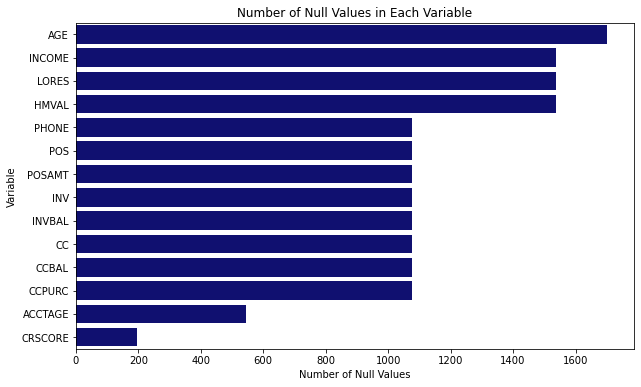

,Variable,Null_Count
12,AGE,1702
9,INCOME,1537
10,LORES,1537
11,HMVAL,1537
1,PHONE,1075
2,POS,1075
3,POSAMT,1075
4,INV,1075
5,INVBAL,1075
6,CC,1075


In [4]:
#Find null values
var_with_null = {'Variable': [], 'Null_Count': []}

# Check all variables
for column in train.columns:
    null_count = train[column].isnull().sum()
    if null_count > 0:
        var_with_null['Variable'].append(column)
        var_with_null['Null_Count'].append(null_count)

var_with_null = pd.DataFrame(var_with_null).sort_values(by = 'Null_Count', ascending = False)

# Plot of the number of null values
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Null_Count', y = 'Variable', data = var_with_null, color = 'navy')
plt.title('Number of Null Values in Each Variable')
plt.xlabel('Number of Null Values')
plt.ylabel('Variable')
plt.show()

var_with_null

In [5]:
# Create a binary flag variable that indicates missing values
for var in var_with_null['Variable']:
    train[f'{var}_FLAG'] = train[var].notna().astype(int)

train

,ACCTAGE,DDA,DDABAL,DEP,DEPAMT,CHECKS,DIRDEP,NSF,NSFAMT,PHONE,...,PHONE_FLAG,POS_FLAG,POSAMT_FLAG,INV_FLAG,INVBAL_FLAG,CC_FLAG,CCBAL_FLAG,CCPURC_FLAG,ACCTAGE_FLAG,CRSCORE_FLAG
0,0.7,1,1986.81,1,446.93,1,1,0,0.00,0.0,...,1,1,1,1,1,1,1,1,1,1
1,4.1,0,0.00,0,0.00,0,0,0,0.00,0.0,...,1,1,1,1,1,1,1,1,1,1
2,12.3,1,1069.78,5,6813.58,13,1,0,0.00,2.0,...,1,1,1,1,1,1,1,1,1,1
3,0.8,1,190.03,3,880.25,1,0,1,5.65,NaN,...,0,0,0,0,0,0,0,0,1,1
4,1.6,1,257.13,5,3408.35,14,0,1,60.25,NaN,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8490,10.8,1,2262.87,2,4761.00,7,0,1,7.75,2.0,...,1,1,1,1,1,1,1,1,1,1
8491,6.5,1,3683.22,2,3271.05,13,1,0,0.00,0.0,...,1,1,1,1,1,1,1,1,1,1
8492,8.6,1,46593.63,3,55203.58,9,1,0,0.00,0.0,...,1,1,1,1,1,1,1,1,1,1
8493,NaN,0,0.00,0,0.00,0,0,0,0.00,0.0,...,1,1,1,1,1,1,1,1,0,1


In [6]:
# Identify classes of variables: categorical or continuous
cat_var = []
cont_var = []

for column in train.columns:
    if column == 'BRANCH':
        cat_var.append(column)
    elif train[column].nunique() <= 10:
        cat_var.append(column)
    else:
        cont_var.append(column)

In [7]:
# Use median and mode imputation for continuous and categorical variables, respectively
for var in var_with_null['Variable']:
    if var in cat_var:
        train[var] = train[var].fillna(train[var].mode()[0])
    else:
        train[var] = train[var].fillna(train[var].median())

In [8]:
# Divide predictor variables and target variable into individual dataframes
X_train = train.drop(['INS'], axis = 1)
Y_train = train['INS']

# Create dummy variables for branch (branch is a categorical variable with string values)
branch_dummy = pd.get_dummies((train['BRANCH']), drop_first=True)

# Replace branch with the dummy variables created
X_train = X_train.drop(['BRANCH'], axis = 1)
X_train = pd.concat([X_train, branch_dummy], axis = 1)

# Random Forest

* **Feature Importance**: measures the average decrease in purity in the nodes of the tree (essentially measuring how much each variable improves the purity of the model when it is added)
* **Hyperparameters examples**:

    * **n_estimeators**: number of trees in the random forest model

    * **max_features**: maximum number of features considered for splitting a node

    * **max_depth** = max number of levels in each decision tree
    
    * **min_samples_split** = min number of data points placed in a node before the node is split
    
    * **min_samples_leaf** = min number of data points allowed in a leaf node
    
    * **bootstrap** = method for sampling data points (with or without replacement)
    
    * **cv = 10**: implement a 10-fold cross validation to prevent overfitting

## Training Dataset

In [9]:
# Build a random forest classification model
rf = RandomForestClassifier(n_estimators = 100, random_state = 123, oob_score = True)
rf.fit(X_train, Y_train)

# Report the out-of-bag score
print("Out-of-Bag Score:", rf.oob_score_)

# Feature importance table
feature_importance_df = pd.DataFrame({'Feature': [col for col in X_train.columns], 'Importance': rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
display(feature_importance_df)

Out-of-Bag Score: 0.7364331959976457


,Feature,Importance
12,SAVBAL,0.106138
2,DDABAL,0.079919
0,ACCTAGE,0.061666
34,CRSCORE,0.057683
4,DEPAMT,0.048539
...,...,...
46,CCBAL_FLAG,0.001599
41,POS_FLAG,0.001583
43,INV_FLAG,0.001580
51,B11,0.001163


In [10]:
# First round of tuning hyperparameters
param_grid = {
    'bootstrap': [True],
    'max_features': [5, 7, 9, 11, 13],
    'max_depth': [9, 12, 15, 18],
    'n_estimators': [100, 200, 300, 400, 500]
}

rf = RandomForestClassifier(random_state = 123)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10)

grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'bootstrap': True, 'max_depth': 18, 'max_features': 9, 'n_estimators': 400}

In [11]:
# After first round of tuning
rf = RandomForestClassifier(n_estimators = 400, max_features = 9, max_depth = 18, random_state = 123, oob_score = True)
rf.fit(X_train, Y_train)

# Report the out-of-bag score
print("Out-of-Bag Score:", rf.oob_score_)

# Feature importance table
feature_importance_df = pd.DataFrame({'Feature': [col for col in X_train.columns], 'Importance': rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

Out-of-Bag Score: 0.7398469688051795


,Feature,Importance
12,SAVBAL,0.124598
2,DDABAL,0.084408
0,ACCTAGE,0.055259
34,CRSCORE,0.051133
4,DEPAMT,0.047895
...,...,...
44,INVBAL_FLAG,0.001860
50,B10,0.001810
41,POS_FLAG,0.001807
51,B11,0.001186


In [12]:
# Variable selection by comparing to a random variable
X_train_r = X_train.copy()
X_train_r['random'] = np.random.normal(0, 1, len(X_train))

# Fir the model with the predictor dataset that includes the random variable
rf = RandomForestClassifier(n_estimators = 400, max_features = 9, max_depth = 18, random_state = 123, oob_score = True)
rf.fit(X_train_r, Y_train)

# Feature importance table
feature_importance_df = pd.DataFrame({'Feature': [col for col in X_train_r.columns], 'Importance': rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
12,SAVBAL,0.122330
2,DDABAL,0.081351
0,ACCTAGE,0.051046
68,random,0.050628
34,CRSCORE,0.047168
...,...,...
58,B18,0.001802
40,PHONE_FLAG,0.001782
50,B10,0.001737
51,B11,0.001042


In [13]:
# Keep the top 10 features (9 excluding the random variable) as we do not want to risk removing variables that help in caputring the signals of the target variable
features_to_keep = feature_importance_df.head(10)
features_to_keep = [col for col in features_to_keep['Feature']]
features_to_keep.remove('random')
X_train_imp = X_train[features_to_keep]
X_train_imp

,SAVBAL,DDABAL,ACCTAGE,CRSCORE,DEPAMT,INCOME,HMVAL,AGE,ATMAMT
0,0.00,1986.81,0.7,674.0,446.93,4.0,87.0,51.0,268.88
1,0.00,0.00,4.1,640.0,0.00,30.0,97.0,60.0,0.00
2,0.00,1069.78,12.3,662.0,6813.58,19.0,107.0,55.0,0.00
3,11.47,190.03,0.8,642.0,880.25,20.0,107.0,40.0,1582.34
4,9.80,257.13,1.6,732.0,3408.35,24.0,95.0,54.0,3807.19
...,...,...,...,...,...,...,...,...,...
8490,0.00,2262.87,10.8,655.0,4761.00,60.0,111.0,38.0,5822.28
8491,0.00,3683.22,6.5,668.0,3271.05,35.0,107.0,48.0,1540.75
8492,0.00,46593.63,8.6,721.0,55203.58,45.0,207.0,70.0,0.00
8493,0.00,0.00,4.0,586.0,0.00,69.0,124.0,37.0,0.00


In [14]:
# Rebuild the random forest model with the top 9 features
rf = RandomForestClassifier(n_estimators = 400, max_features = 9, max_depth = 18, random_state = 123, oob_score = True)
rf.fit(X_train_imp, Y_train)

# Report the out-of-bag score
print("Out-of-Bag Score:", rf.oob_score_)

# Feature importance table
feature_importance_df = pd.DataFrame({'Feature': [col for col in X_train_imp.columns], 'Importance': rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

# Given that the oob score got lower and we want to maximize predictive power, keep training with the original training set
# The variables that we removed may have added to the model's ability to better predict the target variable

Out-of-Bag Score: 0.709240729841083


,Feature,Importance
0,SAVBAL,0.190059
1,DDABAL,0.181163
2,ACCTAGE,0.112268
3,CRSCORE,0.109753
4,DEPAMT,0.091402
5,INCOME,0.084817
7,AGE,0.082125
6,HMVAL,0.078323
8,ATMAMT,0.070089


In [15]:
# Use the model after first round of tuning
rf = RandomForestClassifier(n_estimators = 400, max_features = 9, max_depth = 18, random_state = 123, oob_score = True)
rf.fit(X_train, Y_train)

# Report the out-of-bag score
print("Out-of-Bag Score:", rf.oob_score_)

# Feature importance table
feature_importance_df = pd.DataFrame({'Feature': [col for col in X_train.columns], 'Importance': rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

Out-of-Bag Score: 0.7398469688051795


,Feature,Importance
12,SAVBAL,0.124598
2,DDABAL,0.084408
0,ACCTAGE,0.055259
34,CRSCORE,0.051133
4,DEPAMT,0.047895
...,...,...
44,INVBAL_FLAG,0.001860
50,B10,0.001810
41,POS_FLAG,0.001807
51,B11,0.001186


In [16]:
# Second round of tuning hyperparameters
param_grid = {
    'max_features': [8, 9, 10],
    'max_depth': [17, 18, 19],
    'n_estimators': [350, 400, 450]
}

rf = RandomForestClassifier(random_state = 123)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10)

grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'max_depth': 17, 'max_features': 9, 'n_estimators': 450}

In [17]:
# After second round of tuning
rf = RandomForestClassifier(n_estimators = 450, max_features = 9, max_depth = 17, random_state = 123, oob_score = True)
rf.fit(X_train, Y_train)

# Report the out-of-bag score
print("Out-of-Bag Score:", rf.oob_score_)

# Feature importance table
feature_importance_df = pd.DataFrame({'Feature': [col for col in X_train.columns], 'Importance': rf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

Out-of-Bag Score: 0.7413772807533844


,Feature,Importance
12,SAVBAL,0.127079
2,DDABAL,0.084883
0,ACCTAGE,0.053576
34,CRSCORE,0.050322
4,DEPAMT,0.046870
...,...,...
46,CCBAL_FLAG,0.001940
52,B12,0.001897
40,PHONE_FLAG,0.001883
51,B11,0.001109


In [18]:
# Predicted probabilities on the training dataset
INS_hat = rf.predict_proba(X_train)[:,1]
INS_hat = pd.DataFrame({'INS_hat': INS_hat})

X_train['INS_hat'] = INS_hat

,TPR,FPR,Cut-off,Youden
154,0.937629,0.024027,0.363481,0.913601
156,0.937971,0.024386,0.362717,0.913585
160,0.938657,0.025282,0.362137,0.913374
176,0.943454,0.030124,0.354128,0.913331
166,0.940370,0.027075,0.358638,0.913295


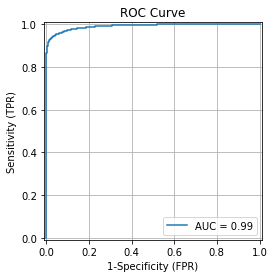

Optimal cutoff is 0.36
Youden's Index (K-S Statistic) is 0.91
Model's AUC is 0.99


In [19]:
# Visualize the ROC curve

# Establish the false positive rate, true positive rate, and the optimal cutoff
fpr, tpr, thresholds = roc_curve(Y_train, X_train['INS_hat'])

# Compute Youden's Index
data = {'TPR': tpr, 'FPR': fpr, 'Cut-off': thresholds, 'Youden': tpr-fpr}
youden = pd.DataFrame(data)
youden = youden.sort_values(by = ['Youden'], ascending = False)
display(youden.head(5))

# Plot ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = auc(fpr, tpr))
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.grid(True)

plt.show()

# Print the optimal cutoff, Youden's index, and AUC
print("Optimal cutoff is", round(youden.loc[154, 'Cut-off'], 2))
print("Youden's Index (K-S Statistic) is", round(youden.loc[154, 'Youden'], 2))
print("Model's AUC is", str(round(auc(fpr, tpr), 2)))

# May be overfitting the training dataset based on the AUC
# Will need to see what the predictions are like on the validation dataset

## Validation Dataset
* Apply all changes made to the training dataset onto the validation dataset
* Get the predicted probabilities of all observations
* Compute and interpret classification metrics

In [23]:
# Create a binary flag variable that indicates missing values
for var in var_with_null['Variable']:
    val[f'{var}_FLAG'] = val[var].notna().astype(int)

# Use median and mode imputation for continuous and categorical variables, respectively
for var in var_with_null['Variable']:
    if var in cat_var:
        val[var] = val[var].fillna(train[var].mode()[0])
    else:
        val[var] = val[var].fillna(train[var].median())

# Divide predictor variables and target variable into individual dataframes
X_val = val.drop(['INS'], axis = 1)
Y_val = val['INS']

# Create dummy variables for branch (branch is a categorical variable with string values)
branch_dummy = pd.get_dummies((val['BRANCH']), drop_first=True)

# Replace branch with the dummy variables created
X_val = X_val.drop(['BRANCH'], axis = 1)
X_val = pd.concat([X_val, branch_dummy], axis = 1)

In [24]:
# Predicted probabilities on the validation dataset
INS_hat = rf.predict_proba(X_val)[:,1]
INS_hat = pd.DataFrame({'INS_hat': INS_hat})

X_val['INS_hat'] = INS_hat

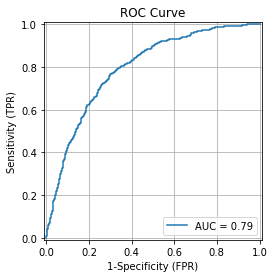

Model's AUC is 0.79


In [25]:
# Visualize the ROC curve

# Establish the false positive rate, true positive rate, and the optimal cutoff
fpr, tpr, thresholds = roc_curve(Y_val, X_val['INS_hat'])

# Plot ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = auc(fpr, tpr))
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.grid(True)

plt.show()

# Print the AUC
print("Model's AUC is", str(round(auc(fpr, tpr), 2)))

# Clearly performed worse compared to the training dataset 
# May be due to overfitting the training data even though we implemented a 10-fold cross validation and explored variable selection
# However, compared to the logistic regression model, the random forest classifier had a higher AUC by 0.01

In [29]:
# Confusion matrix where we make predictions from predicted probabilities based on the optimal cut-off
X_val['INS_pred'] = X_val['INS_hat'].map(lambda x: 1 if x > (youden.loc[154, 'Cut-off']) else 0)
pd.crosstab(Y_val, X_val['INS_pred'])

INS_pred,0,1
INS,,
0,954,428
1,170,572


In [34]:
rf_results_train = X_train[['INS_hat']]
rf_results_train.to_csv('Train_Results_RF.csv')

rf_results_val = X_val[['INS_hat']]
rf_results_val.to_csv('Val_Results_RF.csv')